In [1]:
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
model = tf.keras.models.load_model('EmotionRecognation/models1')

In [3]:
face_cascade = cv2.CascadeClassifier('face.xml')
classes = ['marah', 'takut', 'senang','sedih']

In [5]:
cap = cv2.VideoCapture(1)
while True:
    success, img = cap.read()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    emotion = cv2.resize(img, (160, 160))
    emotion = np.expand_dims(emotion, axis=0)
    emotion = np.vstack([emotion])
    predict = model.predict(emotion)
    if predict[0][0] > predict[0][1] and predict[0][0] > predict[0][2] and predict[0][0] > predict[0][3] :
        pred = 0
    elif predict[0][1] > predict[0][2] and predict[0][1] > predict[0][3]:
        pred = 1
    elif predict[0][2] > predict[0][3]:
        pred = 2
    else:
        pred = 3
    emotion_pred = classes[pred]
    persen = predict[0][pred] * 100
    for (x,y,w,h) in faces:
        img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        cv2.putText(
            img,
            str(persen) + ' %',
            (x, y),
            cv2.FONT_HERSHEY_SIMPLEX,
            1,
            (255, 0, 0),
            3,
            cv2.LINE_AA
        )
        cv2.putText(
            img,
            emotion_pred,
            (x+(w//6), y+h),
            cv2.FONT_HERSHEY_SIMPLEX,
            1,
            (255, 0, 0),
            3,
            cv2.LINE_AA
        )
    cv2.imshow('img',img)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [8]:
model = tf.keras.models.load_model('EmotionRecognation/models1')

In [95]:
success, img = cap.read()

In [97]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

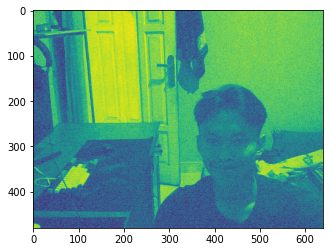

In [98]:
plt.imshow(gray)

In [104]:
img_gray = cv2.resize(img, (160, 160))

In [105]:
x = np.expand_dims(img_gray, axis=0)

images = np.vstack([x])

In [43]:
images

In [113]:
predict = model.predict(images)
print(predict)

[[0.00906082 0.04002939 0.02356452 0.92734534]]


In [114]:
if predict[0][0] > predict[0][1] and predict[0][0] > predict[0][2] and predict[0][1] > predict[0][3] :
    pred = 0
elif predict[0][1] > predict[0][2] and predict[0][1] > predict[0][3]:
    pred = 1
elif predict[0][2] > predict[0][3]:
    pred = 2
else:
    pred = 3
emotion = classes[pred]
print(emotion)

sedih
